In [1]:
import pandas as pd
debug_flag = True
debug_flag2 = False

In [2]:
# constants and converstions to million BTU's
coal_in_btu = 18.911
oil_in_btu = 5.705
natural_gas_in_btu = 1.035
other_gases = 1000

if debug_flag2 == True:
    coal_in_btu = 2
    oil_in_btu = 4
    natural_gas_in_btu = 8
    other_gases = 1

def convert_unit(energy_type, value):
    if energy_type == "Coal (Short Tons)":
        return value * coal_in_btu
    elif energy_type == "Petroleum (Barrels)":
        return value * oil_in_btu
    elif energy_type == "Natural Gas (Mcf)":
        return value * natural_gas_in_btu
    else:
        return value * other_gases

print(convert_unit("Coal (Short Tons)",5))
print(convert_unit("Petroleum (Barrels)",5))
print(convert_unit("Natural Gas (Mcf)",5))
print(convert_unit("Other Gases (Billion BTU)",5))   

94.555
28.525
5.175
5000


In [3]:
# read energy file
energy_source_file = 'Resources/consumptionstatemon.xlsx'
energy_df = pd.read_excel(energy_source_file)
energy_df.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE AND UNITS,CONSUMPTION
0,2001,1,AK,Total Electric Power Industry,Coal (Short Tons),47615.0
1,2001,1,AK,Total Electric Power Industry,Petroleum (Barrels),124998.0
2,2001,1,AK,Total Electric Power Industry,Natural Gas (Mcf),3941267.0
3,2001,1,AK,"Electric Generators, Electric Utilities",Coal (Short Tons),16535.0
4,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum (Barrels),114198.0


In [4]:
# read state file
states_source_file = 'Resources/states.csv'
states_df = pd.read_csv(states_source_file)
states_df.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [5]:
print(energy_df.columns)
energy_df.rename(columns = {'STATE':'Abbreviation', 'CONSUMPTION':'CONSUMPTION_ORG_UNITS'}, inplace = True)
energy_df.head()

Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE AND UNITS',
       'CONSUMPTION'],
      dtype='object')


,YEAR,MONTH,Abbreviation,TYPE OF PRODUCER,ENERGY SOURCE AND UNITS,CONSUMPTION_ORG_UNITS
0,2001,1,AK,Total Electric Power Industry,Coal (Short Tons),47615.0
1,2001,1,AK,Total Electric Power Industry,Petroleum (Barrels),124998.0
2,2001,1,AK,Total Electric Power Industry,Natural Gas (Mcf),3941267.0
3,2001,1,AK,"Electric Generators, Electric Utilities",Coal (Short Tons),16535.0
4,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum (Barrels),114198.0


In [6]:
# rename column using column index. how?
# ergym_df = energy_df.rename(columns={5:'ENERGY SOURCE AND UNITS'}, inplace=True)
# ergym_df.head()

In [7]:
# get unique energy source using column name

if debug_flag == True:
    print("")
    print("**************")
    print("ENERGY SOURCE AND UNITS")
    print(energy_df["ENERGY SOURCE AND UNITS"].unique())

    print("")
    print("**************")
    print("TYPE OF PRODUCER")
    print(energy_df["TYPE OF PRODUCER"].unique())
    print("**************")
# get unique energy source using column name index



**************
ENERGY SOURCE AND UNITS
['Coal (Short Tons)' 'Petroleum (Barrels)' 'Natural Gas (Mcf)'
 'Other Gases (Billion BTU)']

**************
TYPE OF PRODUCER
['Total Electric Power Industry' 'Electric Generators, Electric Utilities'
 'Combined Heat and Power, Electric Power'
 'Combined Heat and Power, Commercial Power'
 'Combined Heat and Power, Industrial Power'
 'Electric Generators, Independent Power Producers']
**************


In [8]:
# filter petroleum
# is_petroleum_sr =  energy_df["ENERGY SOURCE AND UNITS"]=="Petroleum (Barrels)"
# energy_petroleum_df = energy_df[is_petroleum_sr]
# energy_petroleum_df.head()

In [9]:
# filter petroleum and type of producer
# producer_type_sr =  energy_petroleum_df["TYPE OF PRODUCER"]=="Total Electric Power Industry"
# total_petroleum_df = energy_petroleum_df[producer_type_sr]
# total_petroleum_df.head()

In [10]:
# filter "Total Electic Power Industry"
producer_type_sr =  energy_df["TYPE OF PRODUCER"]=="Total Electric Power Industry"
industry_total_df = energy_df[producer_type_sr]
industry_total_df.head()

,YEAR,MONTH,Abbreviation,TYPE OF PRODUCER,ENERGY SOURCE AND UNITS,CONSUMPTION_ORG_UNITS
0,2001,1,AK,Total Electric Power Industry,Coal (Short Tons),47615.0
1,2001,1,AK,Total Electric Power Industry,Petroleum (Barrels),124998.0
2,2001,1,AK,Total Electric Power Industry,Natural Gas (Mcf),3941267.0
12,2001,1,AL,Total Electric Power Industry,Coal (Short Tons),3020601.0
13,2001,1,AL,Total Electric Power Industry,Petroleum (Barrels),284241.0


In [11]:
industry_total_df = industry_total_df.merge(states_df, on='Abbreviation')
industry_total_df.rename(columns = {'State_x':'State'}, inplace = True)
industry_total_df.head()

,YEAR,MONTH,Abbreviation,TYPE OF PRODUCER,ENERGY SOURCE AND UNITS,CONSUMPTION_ORG_UNITS,State
0,2001,1,AK,Total Electric Power Industry,Coal (Short Tons),47615.0,Alaska
1,2001,1,AK,Total Electric Power Industry,Petroleum (Barrels),124998.0,Alaska
2,2001,1,AK,Total Electric Power Industry,Natural Gas (Mcf),3941267.0,Alaska
3,2001,2,AK,Total Electric Power Industry,Coal (Short Tons),57587.0,Alaska
4,2001,2,AK,Total Electric Power Industry,Petroleum (Barrels),119951.0,Alaska


In [12]:
# normalize the unit
industry_total_df['CONSUMPTION'] = industry_total_df.apply(lambda x: convert_unit(x[4], x[5]), axis = 1)
industry_total_df.head()

,YEAR,MONTH,Abbreviation,TYPE OF PRODUCER,ENERGY SOURCE AND UNITS,CONSUMPTION_ORG_UNITS,State,CONSUMPTION
0,2001,1,AK,Total Electric Power Industry,Coal (Short Tons),47615.0,Alaska,900447.265
1,2001,1,AK,Total Electric Power Industry,Petroleum (Barrels),124998.0,Alaska,713113.590
2,2001,1,AK,Total Electric Power Industry,Natural Gas (Mcf),3941267.0,Alaska,4079211.345
3,2001,2,AK,Total Electric Power Industry,Coal (Short Tons),57587.0,Alaska,1089027.757
4,2001,2,AK,Total Electric Power Industry,Petroleum (Barrels),119951.0,Alaska,684320.455


In [13]:
indus_tot_normalized_df = industry_total_df.copy()
# indus_tot_normalized_df = indus_tot_normalized_df.drop(labels=["CONSUMPTION_ORG_UNITS"], axis='columns')
indus_tot_normalized_df.drop(labels=["CONSUMPTION_ORG_UNITS"], axis='columns', inplace=True)
indus_tot_normalized_df.head()

,YEAR,MONTH,Abbreviation,TYPE OF PRODUCER,ENERGY SOURCE AND UNITS,State,CONSUMPTION
0,2001,1,AK,Total Electric Power Industry,Coal (Short Tons),Alaska,900447.265
1,2001,1,AK,Total Electric Power Industry,Petroleum (Barrels),Alaska,713113.590
2,2001,1,AK,Total Electric Power Industry,Natural Gas (Mcf),Alaska,4079211.345
3,2001,2,AK,Total Electric Power Industry,Coal (Short Tons),Alaska,1089027.757
4,2001,2,AK,Total Electric Power Industry,Petroleum (Barrels),Alaska,684320.455


In [14]:
# apply filter
filer_df2 =  pd.DataFrame()
if debug_flag == True:
    filter_column = "ENERGY SOURCE AND UNITS"
    filter_value = "Coal (Short Tons)"
    filter_value = "Natural Gas (Mcf)"
    filter_value = "Other Gases (Billion BTU)"
    filter_value = "Petroleum (Barrels)"

    # filter_value = "District of Columbia"
    # filter_column = "State"

    filer_sr2 = industry_total_df[filter_column] == filter_value
    filer_df2 = industry_total_df[filer_sr2]
    filer_df2 = filer_df2.sort_values(by=['CONSUMPTION'])
filer_df2.head(100)

,YEAR,MONTH,Abbreviation,TYPE OF PRODUCER,ENERGY SOURCE AND UNITS,CONSUMPTION_ORG_UNITS,State,CONSUMPTION
2104,2002,5,DC,Total Electric Power Industry,Petroleum (Barrels),0.00,District of Columbia,0.00000
2139,2005,4,DC,Total Electric Power Industry,Petroleum (Barrels),0.00,District of Columbia,0.00000
3688,2002,6,ID,Total Electric Power Industry,Petroleum (Barrels),0.00,Idaho,0.00000
3694,2002,8,ID,Total Electric Power Industry,Petroleum (Barrels),0.00,Idaho,0.00000
3685,2002,5,ID,Total Electric Power Industry,Petroleum (Barrels),0.00,Idaho,0.00000
...,...,...,...,...,...,...,...,...
3865,2007,5,ID,Total Electric Power Industry,Petroleum (Barrels),33.00,Idaho,188.26500
3817,2006,1,ID,Total Electric Power Industry,Petroleum (Barrels),34.91,Idaho,199.16155
3838,2006,8,ID,Total Electric Power Industry,Petroleum (Barrels),35.08,Idaho,200.13140
3835,2006,7,ID,Total Electric Power Industry,Petroleum (Barrels),36.17,Idaho,206.34985


In [15]:
# of all energy type
indus_tot_normalized_gbdf = indus_tot_normalized_df.groupby(["YEAR", "MONTH", "State"]).sum()
indus_tot_agregated_df = indus_tot_normalized_gbdf.reset_index()

indus_tot_agregated_df.head()

,YEAR,MONTH,State,CONSUMPTION
0,2001,1,Alabama,6.449751e+07
1,2001,1,Alaska,5.692772e+06
2,2001,1,Arizona,4.213304e+07
3,2001,1,Arkansas,2.796406e+07
4,2001,1,California,1.056239e+08


In [16]:
indus_tot_agregated_df.rename(columns=str.lower, inplace=True)
indus_tot_agregated_df.head()

,year,month,state,consumption
0,2001,1,Alabama,6.449751e+07
1,2001,1,Alaska,5.692772e+06
2,2001,1,Arizona,4.213304e+07
3,2001,1,Arkansas,2.796406e+07
4,2001,1,California,1.056239e+08


In [17]:
# capitalize the column names
indus_tot_agregated_df.columns = [x.capitalize() for x in indus_tot_agregated_df.columns]
indus_tot_agregated_df.head()

,Year,Month,State,Consumption
0,2001,1,Alabama,6.449751e+07
1,2001,1,Alaska,5.692772e+06
2,2001,1,Arizona,4.213304e+07
3,2001,1,Arkansas,2.796406e+07
4,2001,1,California,1.056239e+08


In [18]:
indus_tot_agregated_df = indus_tot_agregated_df.loc[(indus_tot_agregated_df["Consumption"] >= 100)]
indus_tot_agregated_df['Consumption'] = indus_tot_agregated_df['Consumption'].apply(lambda x: round(x, 0))
print(indus_tot_agregated_df.agg({'Consumption' : ['min', 'max']}))
indus_tot_agregated_df.head(20)

     Consumption
min       1694.0
max  395723424.0


,Year,Month,State,Consumption
0,2001,1,Alabama,64497509.0
1,2001,1,Alaska,5692772.0
2,2001,1,Arizona,42133042.0
3,2001,1,Arkansas,27964057.0
4,2001,1,California,105623922.0
5,2001,1,Colorado,39650806.0
6,2001,1,Connecticut,12166846.0
7,2001,1,Delaware,5711738.0
8,2001,1,District of Columbia,144964.0
9,2001,1,Florida,112353543.0


In [19]:
# write out to csv file
indus_tot_agregated_df.to_csv('Resources/energy_data.csv', index=False)

In [20]:
# read other worksheet


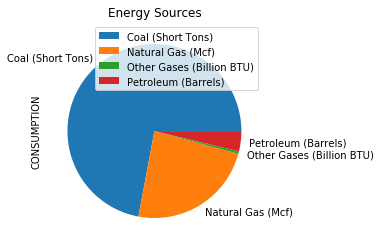

In [27]:
# pie by different energy source
energy_src_df = indus_tot_normalized_df.iloc[:,4:7]
energy_src_df = energy_src_df.drop(labels=["State"], axis='columns')
energy_src_gbdf = energy_src_df.groupby(["ENERGY SOURCE AND UNITS"]).sum()
ax = energy_src_gbdf.plot.pie(y="CONSUMPTION", title="Energy Sources")
ax.figure.savefig("Images/Energy Sources.png", dpi=300)

# indus_tot_normalized_df.head()
# energy_src_df.head()
# energy_src_gbdf.head()


,CONSUMPTION
State,
Texas,25313.172313
Florida,10164.461906
Indiana,8275.888881
Pennsylvania,7815.195790
Ohio,7814.268574
Illinois,7418.330060
California,6284.093659
Missouri,5970.128252
Alabama,5684.645234


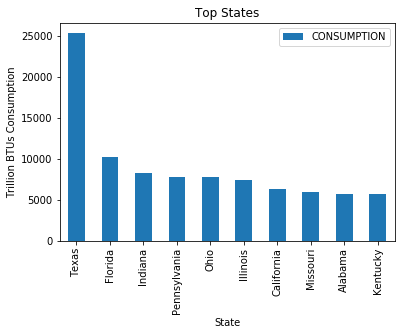

In [26]:
# pie by different energy source
energy_src_df = indus_tot_normalized_df.iloc[:,5:7]
energy_src_gbdf = energy_src_df.groupby(["State"]).sum()
energy_src_gbdf_top10 = energy_src_gbdf.nlargest(10,"CONSUMPTION")

#energy_src_gbdf_top10['CONSUMPTION'] = energy_src_gbdf_top10['CONSUMPTION']/1000000000
energy_src_gbdf_top10['CONSUMPTION'] = energy_src_gbdf_top10['CONSUMPTION'].apply(lambda x: x/1000000 )
ax = energy_src_gbdf_top10.plot.bar(y="CONSUMPTION", title="Top States")
ax.set_ylabel('Trillion BTUs Consumption')
ax.figure.savefig("Images/State Consumption.png", dpi=300)
energy_src_gbdf_top10.head(10)